In [ ]:
#ALL LIBRARIES
from scipy.stats import skew
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import statistics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import math
from sklearn.datasets import load_iris
from sklearn import datasets, linear_model, metrics
from sklearn import preprocessing
import sklearn
from sklearn.datasets import load_boston
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns

In [ ]:
df = pd.read_csv("adm_data.csv")
columns=['GRE Score','TOEFL Score','University Rating','SOP']
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
# PART: A
# Data : Numeric (Quantitative)

In [ ]:
#Average of Each Coloumn
GSC = df["GRE Score"].mean()
TSC = df["TOEFL Score"].mean()
URC = df["University Rating"].mean()
SoPC = df["SOP"].mean()

In [ ]:

GSC = df["GRE Score"]
TSC = df["TOEFL Score"]
URC = df["University Rating"]
SoPC = df["SOP"]

GSC=GSC.fillna(GSC)
TSC=TSC.fillna(TSC)
URC=URC.fillna(URC)
SoPC=SoPC.fillna(SoPC)

df["GRE Score"]=GSC
df["TOEFL Score"]=TSC
df["University Rating"]=URC
df["SOP"]=SoPC

In [ ]:
#Removing Duplicates
df=df.drop_duplicates()

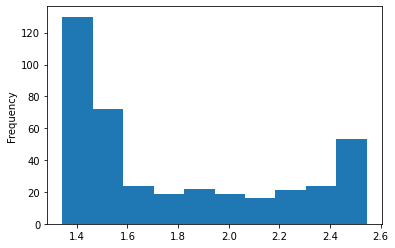

In [ ]:
data=df.skew(axis = 1, skipna = True)
data.plot.hist()
#Data is Left Skewed

In [ ]:
# By Using Z-Score Detecting Outliers
z = np.abs(stats.zscore(data))
print(z)

0      1.711263
1      1.830472
2      1.834493
3      1.761708
4      1.836542
         ...   
395    0.724850
396    0.701320
397    0.776015
398    0.612747
399    0.783410
Length: 400, dtype: float64


In [ ]:
print(np.where(z > 1))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94, 287, 289, 297, 299, 309, 325]),)


In [ ]:
# Removing Outlier By InterQuartile Range Method
bos_hou = load_boston()
column_name = bos_hou.feature_names
df_boston = pd.DataFrame(bos_hou.data)
df_boston.columns = column_name
df_boston.head()
Q1 = np.percentile(data, 25,interpolation = 'midpoint')
Q3 = np.percentile(data, 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", data.shape)
upper = np.where(data >= (Q3+1.5*IQR))
lower = np.where(data <= (Q1-1.5*IQR))
df_boston.drop(upper[0], inplace = True)
df_boston.drop(lower[0], inplace = True)
print("New Shape: ", data.shape)

Old Shape:  (400,)
New Shape:  (400,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# Using Min/Max Scaler. Data is between 0 and 1
scaler = preprocessing.MinMaxScaler()
names =df.columns
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.000000,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.002506,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.005013,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.007519,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.010025,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063
...,...,...,...,...,...,...,...,...,...
395,0.989975,0.68,0.642857,0.50,0.625,0.625,0.717949,1.0,0.761905
396,0.992481,0.70,0.535714,0.50,0.500,0.625,0.740385,1.0,0.793651
397,0.994987,0.80,0.857143,0.75,1.000,0.875,0.849359,1.0,0.904762
398,0.997494,0.44,0.392857,0.50,0.625,0.750,0.634615,0.0,0.523810


In [ ]:
#Iris data set
dataset = load_iris()
a = dataset.data
b = np.zeros(150)
#First Coloumn
for i in range (150):
    b[i]=a[i,1]
b=np.sort(b)
#Bins Making
bin1=np.zeros((30,5))
bin2=np.zeros((30,5))
bin3=np.zeros((30,5))
#Mean
for i in range (0,150,5):
    k=int(i/5)
    mean=(b[i] + b[i+1] + b[i+2] + b[i+3] + b[i+4])/5
    for j in range(5):
        bin1[k,j]=mean
print("Bin Mean: ")
print("\n")
print(bin1)
print("\n")
#Boundaries
for i in range (0,150,5):
    k=int(i/5)
    for j in range (5):
        if (b[i+j]-b[i]) < (b[i+4]-b[i+j]):
            bin2[k,j]=b[i]
        else:
            bin2[k,j]=b[i+4]
print("Bin Boundaries: ")
print("\n")
print(bin2)
print("\n")
# Bin median
for i in range (0,150,5):
    k=int(i/5)
    for j in range (5):
        bin3[k,j]=b[i+2]
print("Bin Median: ")
print("\n")
print(bin3)
print("\n")

Bin Mean: 


[[2.18 2.18 2.18 2.18 2.18]
 [2.34 2.34 2.34 2.34 2.34]
 [2.48 2.48 2.48 2.48 2.48]
 [2.52 2.52 2.52 2.52 2.52]
 [2.62 2.62 2.62 2.62 2.62]
 [2.7  2.7  2.7  2.7  2.7 ]
 [2.74 2.74 2.74 2.74 2.74]
 [2.8  2.8  2.8  2.8  2.8 ]
 [2.8  2.8  2.8  2.8  2.8 ]
 [2.86 2.86 2.86 2.86 2.86]
 [2.9  2.9  2.9  2.9  2.9 ]
 [2.96 2.96 2.96 2.96 2.96]
 [3.   3.   3.   3.   3.  ]
 [3.   3.   3.   3.   3.  ]
 [3.   3.   3.   3.   3.  ]
 [3.   3.   3.   3.   3.  ]
 [3.04 3.04 3.04 3.04 3.04]
 [3.1  3.1  3.1  3.1  3.1 ]
 [3.12 3.12 3.12 3.12 3.12]
 [3.2  3.2  3.2  3.2  3.2 ]
 [3.2  3.2  3.2  3.2  3.2 ]
 [3.26 3.26 3.26 3.26 3.26]
 [3.34 3.34 3.34 3.34 3.34]
 [3.4  3.4  3.4  3.4  3.4 ]
 [3.4  3.4  3.4  3.4  3.4 ]
 [3.5  3.5  3.5  3.5  3.5 ]
 [3.58 3.58 3.58 3.58 3.58]
 [3.74 3.74 3.74 3.74 3.74]
 [3.82 3.82 3.82 3.82 3.82]
 [4.12 4.12 4.12 4.12 4.12]]


Bin Boundaries: 


[[2.  2.3 2.3 2.3 2.3]
 [2.3 2.3 2.3 2.4 2.4]
 [2.4 2.5 2.5 2.5 2.5]
 [2.5 2.5 2.5 2.5 2.6]
 [2.6 2.6 2.6 2.6 2.7]
 [2.7 2.7 

In [ ]:
# Normalizing Data Set

num = int(len(data)*0.50)
data = data[:num]
x = df[df.columns[0:9]]
data_y =x['Research'].values.reshape(-1, 1)
data_x=x['CGPA'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y, test_size=0.25, random_state=0)
logisticReg = LogisticRegression()
logisticReg.fit(x_train, y_train)
pred = logisticReg.predict(x_test)
print("Predicted Labels: ",pred)

Predicted Labels:  [1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0
 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0
 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


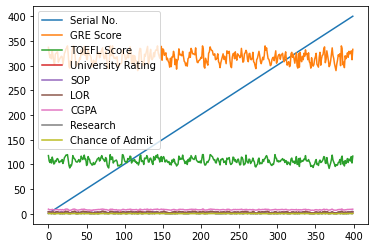

In [ ]:
df.plot()